# Homework 2: Arrays and Data Frames (50 points)

Please complete this notebook by filling in the cells provided. The solved homework should be uploaded to Canvas (with cells evaulated).

**Reading**: Data8 textbook chapters [4](https://inferentialthinking.com/chapters/04/Data_Types.html)(Data Types), and [5](https://inferentialthinking.com/chapters/05/Sequences.html)(Sequences) .

**Deadline**: This assignment is due on Tuesday, January 25 at 9:00am. Late work will not be accepted unless you have made special arrangements with the instructor.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck.


In [1]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd
import statistics as stat

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Water level of Lake Michigan (13 points)

This exercise will look at the level of Lake Michigan.  From (https://tidesandcurrents.noaa.gov/) we can query for
lake level data at the Calumet weather station 
https://tidesandcurrents.noaa.gov/waterlevels.html?id=9087044&units=standard&bdate=19920108&edate=20220109&timezone=LST/LDT&datum=IGLD&interval=m&action=
    

In [2]:
# just run this cell; this loads the datafile and displays the first 5 rows
lakelevel_df=pd.read_csv("LAKELEVEL_30years.csv")
lakelevel_df.head()

,Date,Time (LST/LDT),Highest,MHHW (ft),MHW (ft),MSL (ft),MTL (ft),MLW (ft),MLLW (ft),Lowest (ft),Inf
0,1992/01/01,00:00,579.954,NaN,NaN,578.671,NaN,NaN,NaN,577.336,0
1,1992/02/01,00:00,579.865,NaN,NaN,578.727,NaN,NaN,NaN,577.703,0
2,1992/03/01,00:00,580.994,NaN,NaN,578.920,NaN,NaN,NaN,577.986,0
3,1992/04/01,00:00,580.046,NaN,NaN,579.041,NaN,NaN,NaN,578.186,0
4,1992/05/01,00:00,579.984,NaN,NaN,579.304,NaN,NaN,NaN,578.786,0


In [3]:
# The API I got this from gives me seven columns of garbage. 
# and just run this one too, this pulls out the mean water level column into 
# a numpy array with only one column, and converts to meters above sea level.

lakelevels = lakelevel_df["MSL (ft)"].values * 0.3048
dates = lakelevel_df["Date"]
lakelevels, dates

(array([176.3789208, 176.3959896, 176.454816 , 176.4916968, 176.5718592,
        176.566068 , 176.5764312, 176.5514376, 176.5026696, 176.4871248,
        176.5627152, 176.5060224, 176.5700304, 176.56302  , 176.5581432,
        176.694084 , 176.7330984, 176.8379496, 176.9040912, 176.8839744,
        176.8169184, 176.729136 , 176.6858544, 176.6288568, 176.60112  ,
        176.5959384, 176.6120928, 176.652936 , 176.716944 , 176.758092 ,
        176.8199664, 176.812956 , 176.7769896, 176.6889024, 176.617884 ,
        176.5910616, 176.5349784, 176.5011456, 176.5060224, 176.5459512,
        176.6200176, 176.68494  , 176.6221512, 176.6639088, 176.5749072,
        176.42586  , 176.438052 , 176.3981232, 176.393856 , 176.4118392,
        176.4566448, 176.5133376, 176.640744 , 176.8041168, 176.8559328,
        176.8608096, 176.8760496, 176.8001544, 176.7724176, 176.7742464,
        176.7821712, 176.8352064, 176.9138448, 176.9595648, 177.094896 ,
        177.1625616, 177.215292 , 177.206148 , 177.

**Question 1.** Find the highest, lowest, and mean water level over the 30-year period sampled from `lakelevels`.

In [4]:
high_water = lakelevels.max()
low_water = lakelevels.min()
mean_water = sum(lakelevels)/len(lakelevels)
start_date = "01/01/1992"
end_date = "01/11/2021"
print("Lake Michigan's level was between", low_water, "and", 
      high_water, "and had a mean water level of", mean_water,
      "beween", start_date, "and", end_date)

Lake Michigan's level was between 175.5593136 and 177.5118624 and had a mean water level of 176.4370212835656 beween 01/01/1992 and 01/11/2021


Text(0, 0.5, 'Lake level (m above msl)')

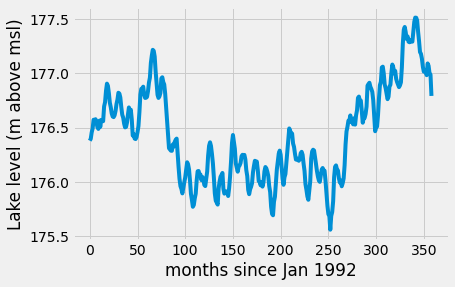

In [5]:
# We better look at this.
plt.plot(lakelevels)
plt.xlabel("months since Jan 1992")
plt.ylabel("Lake level (m above msl)")  

**Question 2.** Find the largest one-month increase and one-month decrease in lake level.

In [6]:
one_month_max = np.max(np.diff(lakelevels[::1]))
print(one_month_max)
one_month_min = np.min(np.diff(lakelevels[::1]))
print(one_month_min)

0.22037039999997887
-0.19690080000000876


**Question 3.** There is nothing special about one month increases, but there is a wet and a dry season in the Great Lakes Basin.  Calculate all of the 6-month differences between water level (the difference between water level now and 6 months ago) and find the largest and smallest of them. 

In [7]:
# ** Hint:  np.roll(n) will shift all the values back by n positions.
test = np.arange(0,30)
testold = np.roll(test, 6)
print(test)
print(testold)
# We will want to remember not to pay attention to the first 6 numbers, 
# since they lack legitimate values for 6 months prior.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[24 25 26 27 28 29  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19 20 21 22 23]


In [8]:
moved_lakelevels = np.roll(lakelevels, 6)
moved_lakelevels = np.diff(lakelevels[::6])
moved_lakelevels
waterhigh = np.max(moved_lakelevels)
waterlow = np.min(moved_lakelevels)
print(waterhigh)
print(waterlow)

0.5919216000000063
-0.5983224000000007


In [9]:
print(np.where(moved_lakelevels == waterhigh))
print(np.where(moved_lakelevels == waterlow))

(array([42]),)
(array([13]),)


**Question 4.** Find the pair of dates for the largest 6-month 
increase and largest 6-month decrease in lake level.



In [10]:
print( dates[42], dates[13])

1995/07/01 1993/02/01


In [11]:
highest_water = waterhigh
highest_date = dates[42]

print("The highest lake level was", highest_water, "in", highest_date)

lowest_water = waterlow
lowest_date = dates[13]

print("The lowest lake level was", lowest_water, "in", lowest_date)


The highest lake level was 0.5919216000000063 in 1995/07/01
The lowest lake level was -0.5983224000000007 in 1993/02/01


**Hint** you will need `np.where()`  which returns the indexes of elements of a Boolean matrix which are True, e.g. 

In [12]:
#  Does anyone remember the unusually high water summer 2019?
print(np.where(lakelevels > 177.4))


(array([330, 340, 341, 342, 343]),)


In [13]:
print( dates[330], dates[340], dates[341], dates[342], dates[343])


2019/07/01 2020/05/01 2020/06/01 2020/07/01 2020/08/01


In [14]:
# note since the dates are *strings* in a *list* I can't easily 
# do math on them or, for instance, plot them.

**Question 5.** The lake level changes slowly.  Last month's measurement may be a good approximation of this month's.  Find the variance of the lake level measurements.  Compare against the variance of the
month-to-month differences in lake level measurements and the six-month differences in lake level measurements.  

In [15]:
lake_level_variance = stat.variance(lakelevels)
lake_level_1modiff_var = stat.variance(np.diff(lakelevels[::1]))
lake_level_6modiff_var = stat.variance(moved_lakelevels)
print(lake_level_variance)
print(lake_level_1modiff_var)
print(lake_level_6modiff_var)

0.18894160813060293
0.005390452487706913
0.11357729912687942


## 2. COVID in Cook County (13 points)

This exercise will look at some coronavirus statistics compiled by the [Illinois Department of Public Health](https://idph.illinois.gov/DPHPublicInformation/api/COVIDExport/GetSnapshotHistorical?format=csv). We downloaded the data on January 18. Running the cell below will show you the first 10 rows of the data table (data frame).

In [16]:
# just run this cell without modifying it
covid_df=pd.read_csv("IDPHExport20220118050537274.csv", skiprows=1)
print("Dataset has", len(covid_df), "rows")
covid_df.head(10)

Dataset has 69992 rows


,CountyName,CumulativeCases,CasesChange,TotalTested,TotalTestedChange,Deaths,DeathsChange,ReportDate
0,Adams,0,0,0,0,0,0,3/17/2020 12:00:00 AM
1,Alexander,0,0,0,0,0,0,3/17/2020 12:00:00 AM
2,Bond,0,0,0,0,0,0,3/17/2020 12:00:00 AM
3,Boone,0,0,0,0,0,0,3/17/2020 12:00:00 AM
4,Brown,0,0,0,0,0,0,3/17/2020 12:00:00 AM
5,Bureau,0,0,0,0,0,0,3/17/2020 12:00:00 AM
6,Calhoun,0,0,0,0,0,0,3/17/2020 12:00:00 AM
7,Carroll,0,0,0,0,0,0,3/17/2020 12:00:00 AM
8,Cass,0,0,0,0,0,0,3/17/2020 12:00:00 AM
9,Champaign,1,1,0,0,0,0,3/17/2020 12:00:00 AM


In [17]:
covid_df.columns

Index(['CountyName', 'CumulativeCases', 'CasesChange', 'TotalTested',
       'TotalTestedChange', 'Deaths', 'DeathsChange', 'ReportDate'],
      dtype='object')

In [18]:
# I read in 70000 rows, which is 102 counties * 680 days.  The
# first 10 lines are counties that don't have cases because it's 
# March of 2020 and no one knows that they have cases, so let us 
# look at the last 10 rows:

In [19]:
covid_df.tail()

,CountyName,CumulativeCases,CasesChange,TotalTested,TotalTestedChange,Deaths,DeathsChange,ReportDate
69987,Whiteside,13011,60,158671,321,205,1,1/18/2022 12:00:00 AM
69988,Will,146379,904,2051892,8422,1318,0,1/18/2022 12:00:00 AM
69989,Williamson,17949,291,221739,956,215,1,1/18/2022 12:00:00 AM
69990,Winnebago,67114,440,838604,2778,711,1,1/18/2022 12:00:00 AM
69991,Woodford,9039,63,134254,351,99,0,1/18/2022 12:00:00 AM


In [20]:
# This index is not going to be very useful for me.. integers 0 through 69991
# This replace the default integer indexes with timestamp indexes, which will make it 
# so that plotting functions handle dates in a reasonable way.
covid_df.index = pd.to_datetime(covid_df.ReportDate)

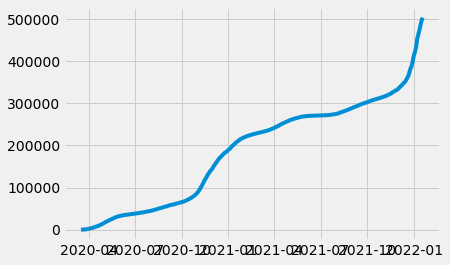

In [21]:
# And now I can do reasonable things like extract only cook county cumulative cases
cumulative_cases_cook = covid_df.iloc[np.where(covid_df.CountyName == "Cook")].CumulativeCases
plt.plot(cumulative_cases_cook)

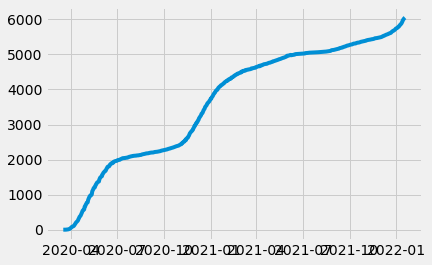

In [22]:
# And deaths
cumulative_deaths_cook = covid_df.iloc[np.where(covid_df.CountyName == "Cook")].Deaths
plt.plot(cumulative_deaths_cook)

In [23]:
# Take just a moment to consider these numbers, 500,000 cases, 6,000 deaths, 
# over the span of two years, in a county of 5 million population. 


**Question 6.** The first line below assigns `positive_cases` to an array of integers corresponding to the daily number of positive cases in Cook County over the length of the data series. Assign the variables `high`, and `average` so that the `print` statement is correct.
plt.plot(positive_cases)

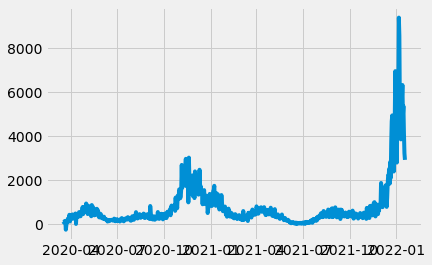

In [24]:
# assign this to a numpy array for now:
positive_cases_cook = covid_df.iloc[np.where(covid_df.CountyName == "Cook")].CasesChange
plt.plot(positive_cases_cook)

In [26]:
low = np.min(positive_cases_cook)
high = np.max(positive_cases_cook)
average = np.mean(positive_cases_cook)

print("Number of daily new positive cases in Cook County ranged from", low, "to", high, "and was", average, "on average.")

Number of daily new positive cases in Cook County ranged from -262 to 9379 and was 748.0995542347697 on average.


**Question 7.** Find the day with the largest number of deaths in Cook County in the timeseries; identify the day and the number of deaths.

In [35]:
print(np.max(cumulative_deaths_cook))
print(covid_df.iloc[np.where(covid_df.Deaths == np.max(cumulative_deaths_cook))])
print("The largest number of deaths in Cook County was 6,049 deaths on 1/18/2022")

6049
           CountyName  CumulativeCases  CasesChange  TotalTested  \
ReportDate                                                         
2022-01-18       Cook           503471         2912      8827464   

            TotalTestedChange  Deaths  DeathsChange             ReportDate  
ReportDate                                                                  
2022-01-18              31496    6049            13  1/18/2022 12:00:00 AM  
The largest number of deaths in Cook County was 6,049 deaths on 1/18/2022


**Question 8.** Find the day with the largest number of cases in Cook County in the timeseries; identify the day and the number of cases.

In [36]:
print(np.max(cumulative_cases_cook))
print(covid_df.iloc[np.where(covid_df.CumulativeCases == np.max(cumulative_cases_cook))])
print("The largest number of cases in Cook County was 503,471 cases on 1/18/2022")

503471
           CountyName  CumulativeCases  CasesChange  TotalTested  \
ReportDate                                                         
2022-01-18       Cook           503471         2912      8827464   

            TotalTestedChange  Deaths  DeathsChange             ReportDate  
ReportDate                                                                  
2022-01-18              31496    6049            13  1/18/2022 12:00:00 AM  
The largest number of cases in Cook County was 503,471 cases on 1/18/2022


There is a day-of-the-week modulation in the death rates and case counts that contributes variation to the reported numbers.  One way to mitigate this source of variation is to take rolling averages over multiples of 7 days.  Rolling averages are easy to calculate from cumulative statistics; they are differences between day n's cumulative statistic and that of day n-14, say, for two-week averages.

**Question 9.**  Calculate the two week rolling average case counts and death rates for Cook County.  
 Find the highest two-week average case rate and the highest two-week-average death rate.
 **Note:** You want to assgn a date to the two-week rolling averages.  Which date makes the most sense?

In [92]:
...
worst_avg_deaths = ...
worst_avg_deaths_date = ...
worst_avg_cases = ...
worst_avg_cases_date = ...
print("The highest 2-week average deaths were ", worst_avg_deaths, "deaths per day on", worst_avg_deaths_date)
print("The highest 2-week average case counts were ", worst_avg_cases, " cases per day on", worst_avg_cases_date)

The highest 2-week average deaths were  Ellipsis deaths per day on Ellipsis
The highest 2-week average case counts were  Ellipsis  cases per day on Ellipsis


## 3. Goodbooks book list (12 points)
This question uses the 10k book dataset https://github.com/zygmuntz/goodbooks-10k/.  There are ~20 million books in Amazon's catalog, so this is a small sample of the space of books available. 

This dataset, scraped from the goodbooks website, includes 10,000 books and 60 million ratings.

The table of books can be found here: 'https://github.com/zygmuntz/goodbooks-10k/blob/master/books.csv?raw=true'


In [37]:
books = pd.read_csv("books.csv")
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [38]:
# Since not all these columns fit on the screen, we should at least look at their names
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [39]:
# or the first row
books.iloc[0]

book_id                                                                      1
goodreads_book_id                                                      2767052
best_book_id                                                           2767052
work_id                                                                2792775
books_count                                                                272
isbn                                                                 439023483
isbn13                                                         9780439023480.0
authors                                                        Suzanne Collins
original_publication_year                                               2008.0
original_title                                                The Hunger Games
title                                  The Hunger Games (The Hunger Games, #1)
language_code                                                              eng
average_rating                                      

In [40]:
# With mild curiosity, let us look at the oldest books in the table: 
books.sort_values("original_publication_year").head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
2075,2076,19351,19351,3802528,266,141026286,9.780141e+12,"Anonymous, N.K. Sandars",-1750.0,Shūtur eli sharrī,...,44345,55856,2247,1551,5850,17627,17485,13343,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2141,2142,1375,1375,1474309,255,147712556,9.780148e+12,"Homer, Robert Fagles, Bernard Knox",-762.0,Ἰλιάς ; Ὀδύσσεια,...,47825,51098,537,916,2608,10439,17404,19731,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
340,341,1371,1371,3293141,1726,140275363,9.780140e+12,"Homer, Robert Fagles, Frédéric Mugler, Bernard...",-750.0,Ἰλιάς,...,241088,273565,4763,7701,20845,68844,89384,86791,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
6165,6166,534289,534289,521797,140,069109750X,9.780691e+12,"Anonymous, Richard Wilhelm, Cary F. Baynes, C....",-750.0,易 [Yì],...,12781,14700,275,178,599,2649,4230,7044,https://images.gr-assets.com/books/1406503668m...,https://images.gr-assets.com/books/1406503668s...
78,79,1381,1381,3356006,1703,143039954,9.780143e+12,"Homer, Robert Fagles, E.V. Rieu, Frédéric Mugl...",-720.0,Ὀδύσσεια,...,670326,710757,8101,29703,65629,183082,224120,208223,https://images.gr-assets.com/books/1390173285m...,https://images.gr-assets.com/books/1390173285s...


And while we're here, we should look at the data types. 
* ISBN's are in scientific notation, which is not the best way to present 13-digit numbers but probably won't cause us problems.  
* The Title and author fields have non-Latin characters; Ὀδύσσεια and 易 [Yì] are among the titles.  Latin letters and basic punctuation are encoded in ASCII; everything else is encoded in Unicode.  In python 3, we can put unicode in strings and not worry too much.  Sometimes the encoding and decoding of unicode will require the attention of the data scientist, but most of the time it does not. https://docs.python.org/3/howto/unicode.html
* There is missing data; missing orig_publication_years are represented by "NaN," the symbol for not-a-number (ironically, stored as a special number) 

**Question 10.**  Show a nice-looking table of the 20 books with the highest average ratings, showing a handful of human-readable fields that fit on the screen without horizontal scrolling.


In [44]:
highratings = books.nlargest(20, "average_rating")
highratings[["authors", "original_publication_year", "original_title", "average_rating", "ratings_count", "isbn"]]

,authors,original_publication_year,original_title,average_rating,ratings_count,isbn
3627,Bill Watterson,2005.0,The Complete Calvin and Hobbes,4.82,28900,740748475
861,Brandon Sanderson,2014.0,Words of Radiance,4.77,73572,765326361
3274,"J.K. Rowling, Mary GrandPré",2003.0,NaN,4.77,33220,439682584
7946,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,4.76,8953,1433502410
8853,Francine Rivers,1993.0,Mark of the Lion Trilogy,4.76,9081,842339523
4482,Bill Watterson,1996.0,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351,836221362
421,J.K. Rowling,1998.0,Complete Harry Potter Boxed Set,4.74,190050,545044251
6360,Bill Watterson,1996.0,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766,836213122
3752,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618,439827604
6589,Bill Watterson,1990.0,The Authoritative Calvin and Hobbes,4.73,16087,751507954


**Question 11.** Find the number of books in this table with at least 100, 1000, 10000, 100000, and 1M reviews.  Not for credit: is there anything about these numbers that strikes you as peculiar?

In [48]:
print(len(np.where(books["work_text_reviews_count"] > 100)[0]))
print(len(np.where(books["work_text_reviews_count"] > 1000)[0]))
print(len(np.where(books["work_text_reviews_count"] > 10000)[0]))
print(len(np.where(books["work_text_reviews_count"] > 100000)[0]))
print(len(np.where(books["work_text_reviews_count"] > 1000000)[0]))

9841
6327
497
4
0


**Question 12.** Show a list of the 15 most recently published books in the dataset.  How many were originally published each year between 2010 and 2020?   Not for credit, but why do you imagine there are comparatively few books from 2016?

## 3. Data frames (12 points)

A subset of the table from https://en.wikipedia.org/wiki/Great_lakes is below:

| Lake Name | Elevation (m) | Surface area (km$^2$) | latitude (deg) | Average depth (m) |
| --- | :-: | :-: | :-: | :-: |
| Erie | 174 | 25700 |  42.1  | 19 | 
| Huron | 176 | 60000 |  45.0 | 59 | 
| Michigan | 176 | 58000 | 43.4 | 85 | 
| Ontario | 75 | 19000 |  43.6 | 86 | 
| Superior | 183 | 82000 |  47.7 | 147 | 

We would like to caluclate the total amount of water impounded by the five lakes in this table. 

**Question 13.** Put the name, surface area, and depth fields into a pandas dataframe called `lakes`.  You will need to choose some column names.  You can choose anything, but if your column names are valid python variable names, you can access columns as attributes of a data frame `lakes.area` in addition to using square brackets `lakes["area"]`.   

In [56]:
lakes = {"name":["Erie","Huron","Michigan","Ontario","Superior"], "SA":[25700,60000,58000,19000,82000], "avgdepth":[19,59,85,86,147]}
lakes_df = pd.DataFrame(data=lakes, index=[0,1,2,3,4])
lakes_df

,name,SA,avgdepth
0,Erie,25700,19
1,Huron,60000,59
2,Michigan,58000,85
3,Ontario,19000,86
4,Superior,82000,147


**Question 14.** Find the total surface area (in km$^2$) of the lakes.

In [57]:
total_surface_area = sum(lakes["SA"])
print(total_surface_area)

244700


**Question 15.** 
Add a column to the dataframe containing the volume (in km$^3$) of each lake and find the total volume of water impounded the five lakes together. 

In [63]:
lakes["vol"] = [488300, 3540000, 4930000, 1634000, 12054000]
total_volume = sum(lakes["vol"]) 
print(total_volume)

22646300


**Question 16.** Find the fraction of the total water accounted for in our table in each of the lakes, that is, divide each lake's volume by the total volume in all five lakes.  How much of the water in the Great Lakes is in Lake Erie?


In [69]:
lake_water_fraction = np.array([488300, 3540000, 4930000, 1634000, 12054000]) / total_volume
print(lake_water_fraction)
print("Lake Erie has", round((lake_water_fraction[0]*100),3), "percent of the water.")

[0.02156202 0.15631693 0.21769561 0.07215307 0.53227238]
Lake Erie has 2.156 percent of the water.
